## MovieLens 20M Dataset

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

%matplotlib inline

### Load Datasets
Load CSV files into corresponding dataframes.

In [2]:
movies = pd.read_csv('./data/ml-small/movies.csv')
ratings = pd.read_csv('./data/ml-small/ratings.csv')
tags = pd.read_csv('./data/ml-small/tags.csv')

### Preview Datasets
Display the top 5 rows of each dataframe.

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
len(movies)

9742

In [5]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [6]:
len(tags)

3683

In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
len(ratings)

100836

In [9]:
len(ratings.userId.unique())

610

### Data Cleaning
Check duplicates and missing values. Drop unwanted columns.

In [10]:
#Check Missing values
print('Number of missing values in ratings:',ratings.isnull().sum().sum())
print('Number of missing values in tags:',tags.isnull().sum().sum())
print('Number of missing values in movies:',movies.isnull().sum().sum())

Number of missing values in ratings: 0
Number of missing values in tags: 0
Number of missing values in movies: 0


In [11]:
#Check Duplicate Values
print('Number of duplicate values in ratings:',len(ratings[ratings.duplicated(['movieId','userId'])].index))
print('Number of duplicate values in tags:',len(tags[tags.duplicated(['movieId','userId','tag'])].index))
print('Number of duplicate values in movies:',len(movies[movies.duplicated(['movieId'])].index))

Number of duplicate values in ratings: 0
Number of duplicate values in tags: 0
Number of duplicate values in movies: 0


This dataset is very clean with no missing or duplicate values.

In [12]:
#Based on my research on algorithms, timestamp is irrelevent and would be remove from the dataset.
tags = tags.drop(['timestamp'],axis=1)
ratings = ratings.drop(['timestamp'],axis=1)

### Rating Normalization
Considering different users have different rating principles, some may be very tolerant to movies they don't like and some users might be harsh on ratings. A standard normalization is performed based on each users' record.

In [13]:
#Transform for calculation
ratings_mat = pd.pivot_table(ratings,values='rating',index=['movieId'],
                                  columns=['userId'],fill_value=np.nan)
ratings_mat.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
ratings['rating'].describe() 

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [15]:
#Normalization
ratings_norm = ratings_mat-ratings_mat.mean()
ratings_norm = ratings_norm.div(ratings_mat.std(),axis='columns')
ratings_norm = ratings_norm.transpose()
ratings_norm.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.457947,NaN,-0.457947,NaN,NaN,-0.457947,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.367146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Stack to original format
ratings_new = ratings_norm.stack().to_frame(name='ratings')
ratings_new.reset_index(inplace=True)
ratings_new.head()

,userId,movieId,ratings
0,1,1,-0.457947
1,1,3,-0.457947
2,1,6,-0.457947
3,1,47,0.791978
4,1,50,0.791978


In [17]:
#New rating stats
ratings_new['ratings'].describe()

count    1.008160e+05
mean     3.876354e-18
std      9.969800e-01
min     -5.901622e+00
25%     -6.182146e-01
50%      1.270298e-01
75%      6.904992e-01
max      2.974428e+00
Name: ratings, dtype: float64

In [18]:
#Save to File
ratings_new.to_csv('processed_data/ratings_small_new.csv',index=False)

### Transform movies dataframe

In [19]:
#Split year from title and stats into datafram
movies = pd.read_csv('./data/ml-small/movies.csv')
movies = movies.set_index('movieId')
movies['num_ratings'] = ratings.groupby('movieId').size()
mean_ratings = ratings.groupby('movieId')['rating'].mean()
movies['avg_rating'] = mean_ratings
movies['year'] = movies.title.str.extract(pat=r'(\(\d\d\d\d\))',expand=True)
movies['year'] = movies.year.str[1:-1]
movies.head()

,title,genres,num_ratings,avg_rating,year
movieId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930,1995
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818,1995
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615,1995
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143,1995
5,Father of the Bride Part II (1995),Comedy,49.0,3.071429,1995


In [20]:
# the mean vote across the whole report
C = ratings.rating.mean()

In [21]:
def weighted_rating(movie):
    v = movie.num_ratings
    R = movie.avg_rating
    m = 100 #minimum_votes required to be listed in Top50
    weighted_rating = (v/(v+m))*R+(m/(v+m))*C
    return weighted_rating

In [22]:
movies['weighted_avg'] = movies.apply(weighted_rating,axis = 1)
movies.head()

,title,genres,num_ratings,avg_rating,year,weighted_avg
movieId,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930,1995,3.787796
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818,1995,3.465027
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615,1995,3.418787
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143,1995,3.426689
5,Father of the Bride Part II (1995),Comedy,49.0,3.071429,1995,3.360105


In [23]:
#Split the genres
genre_set = set()
for idx,row in movies.iterrows():
    l = row.genres.split('|')
    genre_set.update(l)
print(genre_set)

{'Comedy', 'Mystery', 'Romance', 'Musical', 'Western', 'Horror', 'Fantasy', 'Thriller', 'War', 'Adventure', 'Children', 'Action', 'IMAX', 'Crime', 'Animation', 'Documentary', 'Film-Noir', 'Sci-Fi', '(no genres listed)', 'Drama'}


In [24]:
# remove '(no genres listed)' from the set
genre_set.remove('(no genres listed)')

In [25]:
movies_genre_df = movies.copy()
for genre_name in genre_set:
    movies_genre_df[genre_name] = movies_genre_df.apply(lambda _:int(genre_name in _.genres), axis = 1 )
movies_genre_df = movies_genre_df.drop('genres',axis =1)

In [26]:
movies_genre_df.head()

,title,num_ratings,avg_rating,year,weighted_avg,Comedy,Mystery,Romance,Musical,Western,...,Adventure,Children,Action,IMAX,Crime,Animation,Documentary,Film-Noir,Sci-Fi,Drama
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),215.0,3.920930,1995,3.787796,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
2,Jumanji (1995),110.0,3.431818,1995,3.465027,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),52.0,3.259615,1995,3.418787,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Waiting to Exhale (1995),7.0,2.357143,1995,3.426689,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Father of the Bride Part II (1995),49.0,3.071429,1995,3.360105,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Analysis

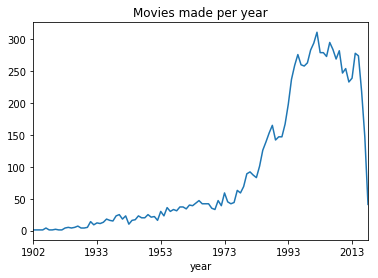

In [27]:
movies.groupby('year').size().plot(title='Movies made per year')

In [28]:
#Top ten rated movies
movies.sort_values(by=['num_ratings'],ascending=False).head(10)

,title,genres,num_ratings,avg_rating,year,weighted_avg
movieId,,,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134,1994,4.009687
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022,1994,4.206608
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068,1994,4.026181
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290,1991,3.987218
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446,1999,4.009671
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076,1977,4.023236
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000,1993,3.676496
110,Braveheart (1995),Action|Drama|War,237.0,4.031646,1995,3.874349
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982,1991,3.826098


In [29]:
#tag analysis
print('Total number of unique tags:', len(tags.tag.unique()))

Total number of unique tags: 1589


In [30]:
#Top 10 Tags
tags.groupby('tag').size().to_frame(name='frequency').sort_values(by=['frequency'],ascending=False).head(10)

,frequency
tag,
In Netflix queue,131
atmospheric,36
thought-provoking,24
superhero,24
Disney,23
surreal,23
funny,23
religion,22
dark comedy,21


In [31]:
movies_genre_df[movies_genre_df['Drama']==1].sort_values(['weighted_avg'],ascending=False).title.head(10)

movieId
318      Shawshank Redemption, The (1994)
2959                    Fight Club (1999)
296                   Pulp Fiction (1994)
858                 Godfather, The (1972)
356                   Forrest Gump (1994)
527               Schindler's List (1993)
58559             Dark Knight, The (2008)
1221       Godfather: Part II, The (1974)
2028           Saving Private Ryan (1998)
1213                    Goodfellas (1990)
Name: title, dtype: object

In [32]:
movies.to_csv('processed_data/movies_new.csv',index=True)